In [13]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [14]:
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [15]:
#2018
from zipfile import ZipFile
directory_18 = r'F:\Ecobee\files\2018_sac'
df_sac_18_daily_peak = pd.DataFrame()
import datetime
for filename in os.listdir(directory_18):
    myzip = ZipFile(os.path.join(directory_18, filename))
    g = myzip.open(filename[:-4])
    df_temp = pd.read_csv(g, parse_dates=['DateTime'])
    df_temp1 = df_temp[df_temp.HvacMode=='cool']
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour >= 17) &
                        (df_temp1['DateTime'].dt.hour < 20) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = (
        df_temp1.groupby([df_temp1['Date']])
        .agg(
            avg_set_point_cool=pd.NamedAgg(column="T_stp_cool", aggfunc=np.mean),
            user_id=pd.NamedAgg(column="user_id", aggfunc=min),
        )
        .reset_index()
    )
    df_sac_18_daily_peak = pd.concat([df_sac_18_daily_peak, df_day])
    g.close()
    myzip.close()

In [16]:
df_sac_18_daily_peak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11255 entries, 0 to 11
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                11255 non-null  object 
 1   avg_set_point_cool  11181 non-null  float64
 2   user_id             11255 non-null  object 
dtypes: float64(1), object(2)
memory usage: 351.7+ KB


In [17]:
from zipfile import ZipFile
df_sac_19_daily_peak = pd.DataFrame()
directory_19 = r'F:\Ecobee\files\2019_sac'
import datetime
for filename in os.listdir(directory_19):
    myzip = ZipFile(os.path.join(directory_19, filename))
    f = myzip.open(filename[:-4])
    df_temp = pd.read_csv(f, parse_dates=['DateTime'])
    df_temp1 = df_temp[df_temp.HvacMode=='cool']
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour >= 17) &
                        (df_temp1['DateTime'].dt.hour < 20) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = (
        df_temp1.groupby(["Date"])
        .agg(
            avg_set_point_cool=pd.NamedAgg(column="T_stp_cool", aggfunc=np.mean),
            user_id=pd.NamedAgg(column="user_id", aggfunc=min),
        )
        .reset_index()
    )
    df_sac_19_daily_peak = pd.concat([df_sac_19_daily_peak, df_day])
    f.close()
    myzip.close()

In [18]:
df_sac_19_daily_peak.head()
#note there is a "time jump" from 2019-07-25 16:55 to 2019-07-26 17:00

,Date,avg_set_point_cool,user_id
0,2019-06-02,77.0,00e2f68ec737f7480114a67bbef7c5f65b6b8516
1,2019-06-03,77.0,00e2f68ec737f7480114a67bbef7c5f65b6b8516
2,2019-06-04,77.0,00e2f68ec737f7480114a67bbef7c5f65b6b8516
3,2019-06-05,77.0,00e2f68ec737f7480114a67bbef7c5f65b6b8516
4,2019-06-06,77.0,00e2f68ec737f7480114a67bbef7c5f65b6b8516


In [19]:
df_sac_18n19_daily_peak=pd.concat([df_sac_18_daily_peak,df_sac_19_daily_peak])
df_sac_18n19_daily_peak.head()

,Date,avg_set_point_cool,user_id
0,2018-06-01,74.500000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
1,2018-06-02,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
2,2018-06-03,77.555556,00e2f68ec737f7480114a67bbef7c5f65b6b8516
3,2018-06-04,78.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
4,2018-06-06,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516


In [42]:
df_sac_18n19_daily_peak['count'] = df_sac_18n19_daily_peak.groupby('user_id')['user_id'].transform('count')
df_sac_18n19_daily_peak['count'].value_counts().reset_index().sort_values('index',ascending=False).head(30)

,index,count
3,239,1195
0,238,1904
1,237,1659
2,236,1416
5,235,470
6,234,468
7,233,233
4,232,928
8,231,231


In [23]:
df_sac_18n19_daily_peak.head()

,Date,avg_set_point_cool,user_id,count
0,2018-06-01,74.500000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236
1,2018-06-02,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236
2,2018-06-03,77.555556,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236
3,2018-06-04,78.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236
4,2018-06-06,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236


In [24]:
df_sac_18n19_daily_peak=df_sac_18n19_daily_peak[df_sac_18n19_daily_peak['count']>=230]
df_sac_18n19_daily_peak['Date']=pd.to_datetime(df_sac_18n19_daily_peak['Date'])
df_sac_18n19_daily_peak.head()

,Date,avg_set_point_cool,user_id,count
0,2018-06-01,74.500000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236
1,2018-06-02,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236
2,2018-06-03,77.555556,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236
3,2018-06-04,78.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236
4,2018-06-06,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236


In [25]:
df_temperature=pd.read_csv(r'F:\Ecobee\smf_temp_18and19.csv', parse_dates=['DATE'])
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  730 non-null    object        
 1   NAME     730 non-null    object        
 2   DATE     730 non-null    datetime64[ns]
 3   TAVG     730 non-null    int64         
 4   TMAX     730 non-null    int64         
 5   TMIN     730 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 34.3+ KB


In [26]:
df_temperature.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-01,49,65,38
1,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-02,48,59,39
2,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-03,50,57,40
3,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-04,55,65,49
4,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-05,55,60,50


In [27]:
df_sac_18n19_daily_peak_w_temperature=pd.merge(df_sac_18n19_daily_peak,df_temperature,how='left', left_on='Date', right_on='DATE')
df_sac_18n19_daily_peak_w_temperature.head()

,Date,avg_set_point_cool,user_id,count,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,2018-06-01,74.500000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
1,2018-06-02,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-02,74,96,55
2,2018-06-03,77.555556,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-03,78,98,58
3,2018-06-04,78.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-04,76,89,58
4,2018-06-06,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-06,65,79,54


In [28]:
df_sac_18n19_daily_peak_w_temperature[
    'TAVG_less_62'] = df_sac_18n19_daily_peak_w_temperature['TAVG'] - 62
df_sac_18n19_daily_peak_w_temperature['TAVG_less_62'] = df_sac_18n19_daily_peak_w_temperature['TAVG_less_62'].apply(lambda x : x if x > 0 else 0)

In [29]:
df_sac_18n19_daily_peak_w_temperature['y2019']=np.where(df_sac_18n19_daily_peak_w_temperature['Date'].dt.year== 2019, 1, 0)
# [df_sac_18n19_daily_peak_w_temperature['Date'].dt.year==2019]
df_sac_18n19_daily_peak_w_temperature.describe()

,avg_set_point_cool,count,TAVG,TMAX,TMIN,TAVG_less_62,y2019
count,8416.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000
mean,77.732486,236.244591,72.731068,90.418509,58.504586,10.765169,0.508114
std,4.401298,2.289812,5.136820,7.179013,3.940965,5.052657,0.499964
min,65.000000,231.000000,58.000000,69.000000,45.000000,0.000000,0.000000
25%,75.000000,235.000000,69.000000,86.000000,56.000000,7.000000,0.000000
50%,78.000000,237.000000,73.000000,91.000000,58.000000,11.000000,1.000000
75%,80.000000,238.000000,76.000000,96.000000,61.000000,14.000000,1.000000
max,92.000000,239.000000,86.000000,105.000000,69.000000,24.000000,1.000000


In [30]:
df_sac_18n19_daily_peak_w_temperature[
    'interaction'] = df_sac_18n19_daily_peak_w_temperature[
        'TAVG_less_62'] * df_sac_18n19_daily_peak_w_temperature['y2019']

In [31]:
import statsmodels.api as sm


def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit(cov_type='HC1')
    return result.params


#This is what you need
results=df_sac_18n19_daily_peak_w_temperature.groupby('user_id').apply(
    regress, 'avg_set_point_cool', ['TAVG_less_62','interaction']).reset_index()
results.head(10)

,user_id,TAVG_less_62,interaction,intercept
0,00e2f68ec737f7480114a67bbef7c5f65b6b8516,-0.021617,0.062614,77.030048
1,0614c5d47de23d61b21be2141907668a54bf45a0,0.176165,-0.344889,74.865737
2,0773f65bc76833bddd55f0f850ded5d14bc8ab99,NaN,NaN,NaN
3,0ed748d62777165f02e04693fa57812603a16fa7,-0.080615,0.101830,70.599787
4,0f50223ca3a7c1def87d95d3696719692d5d3d33,-0.124338,0.225140,79.575577
5,138d3e21dc03b5b4bd5d3063859d11ad3bbac2fb,-0.184836,0.083271,77.985296
6,1a85f6383418f7b3351f3ea3356f6fdc0875db6f,NaN,NaN,NaN
7,1e06287bc6bcf88b94435bf3d3e9f3d9005b12b7,0.017687,-0.036898,78.336617
8,1efee35979aa02673207f251f9ccc40d0a77f131,0.014403,0.212708,74.150429
9,203242485deb5293ee28b5cb1b2d5a0160ab3a25,-0.000345,-0.009081,79.167340


In [32]:
# creat temperature bins
df_sac_18n19_daily_peak_w_temperature["temp_bins"] = pd.cut(
    df_sac_18n19_daily_peak_w_temperature["TAVG"],
    bins=[57, 62, 66, 70, 74, 78, 82, 86],
    right=True,
)
df_sac_18n19_daily_peak_w_temperature["coded_bins"] = pd.cut(
    df_sac_18n19_daily_peak_w_temperature["TAVG"],
    bins=[57, 62, 66, 70, 74, 78, 82, 86],
    right=True,
    labels=['1', '2', '3', '4', '5', '6', '7']
)

In [33]:
df_sac_18n19_daily_peak_w_temperature.head()

,Date,avg_set_point_cool,user_id,count,STATION,NAME,DATE,TAVG,TMAX,TMIN,TAVG_less_62,y2019,interaction,temp_bins,coded_bins
0,2018-06-01,74.500000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49,3,0,0,"(62, 66]",2
1,2018-06-02,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-02,74,96,55,12,0,0,"(70, 74]",4
2,2018-06-03,77.555556,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-03,78,98,58,16,0,0,"(74, 78]",5
3,2018-06-04,78.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-04,76,89,58,14,0,0,"(74, 78]",5
4,2018-06-06,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,236,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-06,65,79,54,3,0,0,"(62, 66]",2


In [34]:
list_of_temp_bins=df_sac_18n19_daily_peak_w_temperature["temp_bins"].unique()
# list_of_temp_bins=list_of_temp_bins.tolist()
# list_of_temp_bins.sort()
list_of_temp_bins

[(62, 66], (70, 74], (74, 78], (66, 70], (57, 62], (82, 86], (78, 82]]
Categories (7, interval[int64]): [(57, 62] < (62, 66] < (66, 70] < (70, 74] < (74, 78] < (78, 82] < (82, 86]]

In [35]:
list_of_coded_bins=df_sac_18n19_daily_peak_w_temperature["coded_bins"].unique()
print(type(list_of_coded_bins))
list_of_coded_bins

<class 'pandas.core.arrays.categorical.Categorical'>


['2', '4', '5', '3', '1', '7', '6']
Categories (7, object): ['1' < '2' < '3' < '4' < '5' < '6' < '7']

In [36]:
list_of_coded_bins=list_of_coded_bins.tolist()
list_of_coded_bins.sort()
list_of_coded_bins

['1', '2', '3', '4', '5', '6', '7']

In [37]:
df_sac_18n19_daily_peak_w_temperature["const"] = 1
list_of_results=[]
for coded_bin in list_of_coded_bins:
    reg_data = df_sac_18n19_daily_peak_w_temperature[
        df_sac_18n19_daily_peak_w_temperature["coded_bins"] == coded_bin]
    current_reg=sm.OLS(endog=reg_data['avg_set_point_cool'], \
              exog=reg_data[['TAVG_less_62','interaction','const']], \
                missing='drop')
    current_regresult =  current_reg.fit()#fit(cov_type='HC1')
    print('Results for Bin '+str(coded_bin)*20)
    print('\n')
    print(current_regresult.summary())
    print('\n')
    print('\n')
    list_of_results.append(current_regresult)

Results for Bin 11111111111111111111


                            OLS Regression Results                            
Dep. Variable:     avg_set_point_cool   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 19 Apr 2021   Prob (F-statistic):                nan
Time:                        16:10:40   Log-Likelihood:                -401.05
No. Observations:                 134   AIC:                             804.1
Df Residuals:                     133   BIC:                             807.0
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TAVG_less

In [43]:
interaction_coeffs=[]
for i in range(7):
    interaction_coeffs.append(list_of_results[i].params[1])
print(interaction_coeffs)
interaction_coeff_se=[]
for i in range(7):
    interaction_coeff_se.append(list_of_results[i].bse[1])
print(interaction_coeff_se)
interaction_coeffs_plusSE= [a + b for a, b in zip(interaction_coeffs, interaction_coeff_se)]
print(interaction_coeffs_plusSE)
interaction_coeffs_minusSE=[a - b for a, b in zip(interaction_coeffs, interaction_coeff_se)]
print(interaction_coeffs_minusSE)

[0.0, 0.17308961555763425, 0.07252305885358871, 0.03719697643061176, 0.003708649296318035, 0.02227823581908779, -0.0018206201050740972]
[0.0, 0.11101565930340905, 0.0318617210275609, 0.016592706981349924, 0.013411074803203518, 0.017747985137069062, 0.04222871462635614]
[0.0, 0.2841052748610433, 0.10438477988114961, 0.053789683411961685, 0.017119724099521554, 0.04002622095615685, 0.040408094521282044]
[0.0, 0.062073956254225196, 0.040661337826027814, 0.020604269449261838, -0.009702425506885482, 0.004530250682018729, -0.04404933473143024]


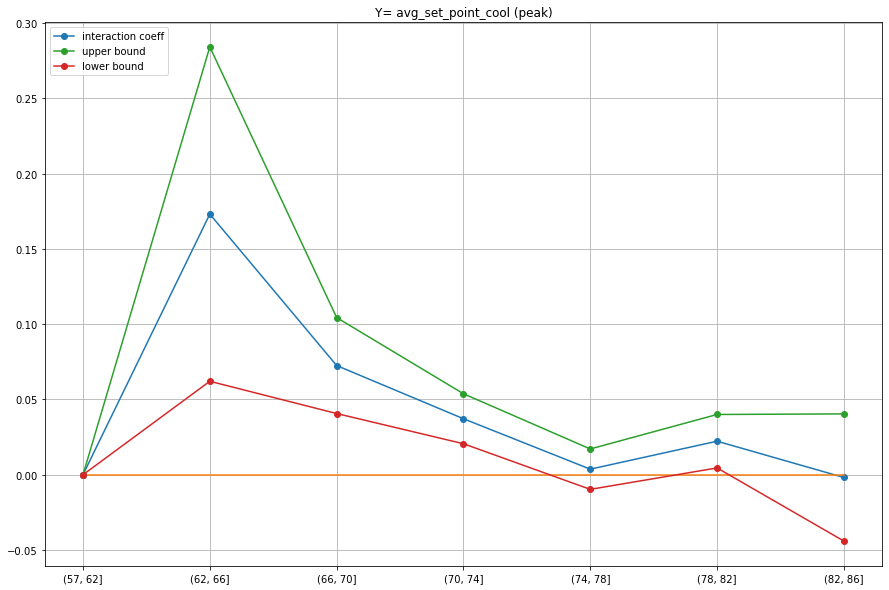

In [44]:
# x axis range
x = range(len(interaction_coeffs))
plt.figure(figsize=(15,10))
# y
plt.plot(x,interaction_coeffs,'o-', label='interaction coeff')
plt.plot(x,[0] * len(interaction_coeffs))
plt.plot(x,interaction_coeffs_plusSE,'o-', label='upper bound')
plt.plot(x,interaction_coeffs_minusSE,'o-', label='lower bound')
plt.legend(loc="upper left")
plt.xticks(x,('(57, 62]', '(62, 66]', '(66, 70]', '(70, 74]', '(74, 78]', '(78, 82]',  '(82, 86]') )
plt.grid()
plt.title("Y= avg_set_point_cool (peak)")
plt.show()

might be constantly setting higher (might used to be setting lower when out_temp low and higher whe nout temp high)